In [2]:
import importlib.util
import sys

# Define the file path
file_path = r"C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\HRDiagram.py"

# Load the module
spec = importlib.util.spec_from_file_location("HRDiagram", file_path)
HRDiagram = importlib.util.module_from_spec(spec)
sys.modules["HRDiagram"] = HRDiagram
spec.loader.exec_module(HRDiagram)


In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import h5py
from matplotlib.pyplot import figure
from scipy import stats
from scipy import stats
from scipy.stats import skewnorm
from HRDiagram import color_map_HR
color_map_HR
import matplotlib.patches as patches
pd.set_option('display.max_columns', None)

In [9]:
contact = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\data\contact.csv', low_memory=False)
LMXBs = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\data\lmxb.csv', low_memory=False)
HMXBs = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\data\hmxb.csv', low_memory=False)
detached = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\data\detached.csv', low_memory=False)
XBs = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\data\xb.csv', low_memory=False)
V404Dataset  = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\data\V404dataset.csv', low_memory=False)

EndStateDataset  = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\data\enddf.csv', low_memory=False)


EntireDataset = pd.read_hdf(r'data\1e+00_Zsun_population_max.h5', key = 'history')





In [ ]:
# SaveLoc = r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\graphs\testing\\'

SaveLoc = r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\paper\figs\GeneratedFigs\\'

V404CyngiSaveLoc = r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\paper\figs\GeneratedFigs\V404_Cyngi\\'

VelaX1SaveLoc = r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\paper\figs\GeneratedFigs\VelaX-1\\'

C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\HRDiagram.py:71: RuntimeWarning: divide by zero encountered in log10
  log_temp_min = np.log10(exampleTempMin)
C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\HRDiagram.py:72: RuntimeWarning: divide by zero encountered in log10
  log_temp_max = np.log10(exampleTempMax)
C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\HRDiagram.py:83: RuntimeWarning: invalid value encountered in scalar subtract
  width = overlap_temp_max - overlap_temp_min
c:\Users\iatpuser\anaconda3\Lib\site-packages\matplotlib\transforms.py:2038: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx
C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\HRDiagram.py:71: RuntimeWarning: divide by zero encountered in log10
  log_temp_min = np.log10(exampleTempMin)
C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\HRDiagram.py:72: RuntimeWarning: divide by zero encountered in log10
  log_temp_max = np.log10(exampleTemp

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\iatpuser\\Desktop\\Code\\Honors-Independent-Study\\paper\\figs\\GeneratedFigs\\_W Ursae Majories HR Context_Star Two $M_{\\odot}$_log10_F_star radius_5.png'

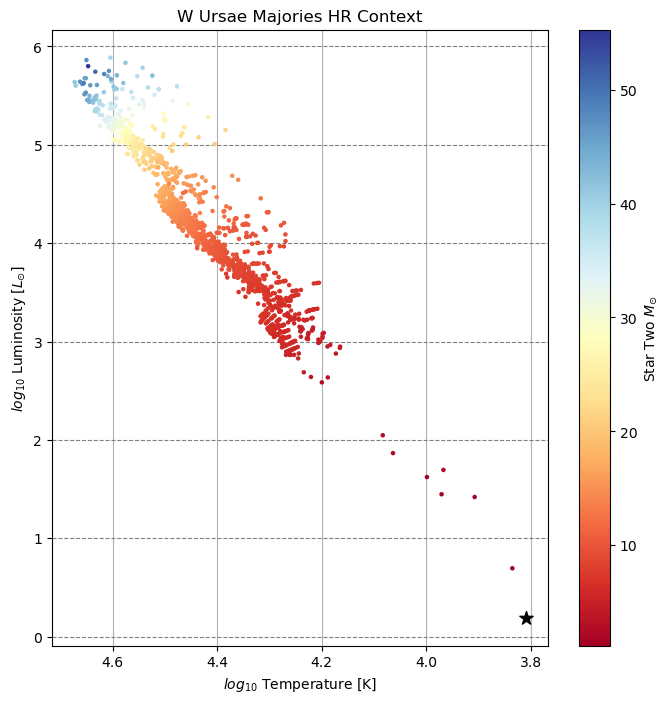

In [ ]:
# MasterGrapher(contact, SaveLoc, 'Contact binaries', massHistoStar2 = 'T', massHistoStar1 = 'T', eccHisto = 'F', eccHistoFit= 'F', HRDiagram= 'T' )
# MasterGrapher(LMXBs, SaveLoc, 'Low Mass X-ray Binaries', massHistoStar2 = 'T', eccHisto = 'F', eccHistoFit= 'T', HRDiagram= 'T' )
# MasterGrapher(HMXBs, SaveLoc, 'High Mass X-ray Binaries', massHistoStar2 = 'T', eccHisto = 'F', eccHistoFit= 'T', HRDiagram= 'T')
# MasterGrapher(XBs, SaveLoc, 'X-ray Binaries', massHistoStar2 = 'T', eccHisto = 'T', eccHistoFit= 'T', HRDiagram= 'T')
# MasterGrapher(detached, SaveLoc, 'Detached Binaries', massHistoStar2 = 'T', eccHisto = 'T', eccHistoFit= 'T', HRDiagram= 'T')


# color_map_HR(DB = HMXBs, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', examplePoint='T', exampleLum=(1584893+630957)/2, exampleTemp = 33700, exampleTempMin= 33700 - 5200, exampleTempMax = 33700 + 5200, exampleLumMin = 630957, exampleLumMax= 1584893, title='Vela X-1 compared with HMXBs', saveLoc=VelaX1SaveLoc, ylimit='F', style='default', S_R = 5,fileName='VelaX1HMXBPopulationHRComp')

color_map_HR(DB = XBs, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', examplePoint='T', exampleLum=(1584893+630957)/2, exampleTemp = 33700, exampleTempMin= 33700 - 5200, exampleTempMax = 33700 + 5200, exampleLumMin = 630957, exampleLumMax= 1584893, title='Vela X-1 compared with X-ray binary populaton', saveLoc=VelaX1SaveLoc, ylimit='F', style='default', S_R = 5, fileName='VelaX1XrBPopulationHRComp')


color_map_HR(DB = XBs, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', examplePoint='T', exampleLum=8.7, exampleTemp = 4274, title='V404 Cyngi HR Context', saveLoc=V404CyngiSaveLoc, ylimit='F', style='default', S_R = 5, fileName='V404XBsPopulationHRComp')

color_map_HR(DB = EndStateDataset, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', examplePoint='T', exampleLum=8.7, examplePointRange= 'T', exampleLumMax= 8.7+1.7, exampleLumMin= 8.7 - 1.4,  exampleTemp = 4274, title='V404 Cyngi HR Context', saveLoc=V404CyngiSaveLoc, ylimit='F', style='default', S_R = 5, fileName='V404EndStateDatasetPopulationHRComp')


color_map_HR(DB = EntireDataset, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', examplePoint='T', exampleLum=8.7, examplePointRange= 'T', exampleLumMax= 8.7+1.7, exampleLumMin= 8.7 - 1.4,  exampleTemp = 4274, title='V404 Cyngi HR Context', saveLoc=V404CyngiSaveLoc, ylimit='F', style='default', S_R = 5, fileName='V404EntireDatasetPopulationHRComp')

# color_map_HR(DB = contact, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', examplePoint='T', exampleLum=1.557, exampleTemp = 6450, title='W Ursae Majories HR Context', saveLoc=SaveLoc, ylimit='F', style='default', S_R = 5 )

color_map_HR(DB = EntireDataset, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', title='Whole POSYDON Dataset', saveLoc=SaveLoc, ylimit='F', style='default', S_R = 5, fileName='WholePOSYDONDatasetExample')

